# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. How many neighborhood groups are there and which shows up the most?
2. Are private rooms the most popular in Manhattan?
3. Who are the top 10 busiest hosts based on number of reviews per month?
4. Which neighorhood group has the highest average price? Plot the average prices in a professional looking bar chart
5. What is the most expensive neighbourhood in each neighbourhood group?
6. Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
7. Who currently has no (zero) availability with a review count of 100 or more?
8. If each host rents all of their properties for the night, which 5 make the most that night?
9. When did Danielle from Queens last receive a review?
10. Display a bar chart showing the number of each type of room in the Bronx



Happy Coding!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
air_bnb = pd.read_csv('./AB_NYC_2019.csv')
air_bnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# How many neighbourhood groups / which shows up the most

air_bnb['neighbourhood_group'].describe()

# Answer: 5 neighborhood groups and Manhattan shows up the most

count         48895
unique            5
top       Manhattan
freq          21661
Name: neighbourhood_group, dtype: object

In [5]:
# Are private rooms the most popular in Manhattan?
air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan']['room_type'].describe()

# Answer: No. Entire home/apt are the most popular

count               21661
unique                  3
top       Entire home/apt
freq                13199
Name: room_type, dtype: object

In [6]:
# Who are the top 10 busiest hosts based on number of reviews per month?

busiest_hosts = air_bnb.groupby(['host_id','host_name']).sum()
busiest_hosts.sort_values('reviews_per_month', ascending=False)[['reviews_per_month']].head(10)

# Answer: See table below

,,reviews_per_month
host_id,host_name,
219517861,Sonder (NYC),397.56
244361589,Row NYC,111.72
232251881,Lakshmee,80.63
26432133,Danielle,68.02
137274917,David,62.89
224414117,Gabriel,59.10
156948703,Asad,56.44
344035,Brooklyn& Breakfast -Len-,56.00
156684502,Nalicia,54.38


Text(0, 0.5, 'Average Price')

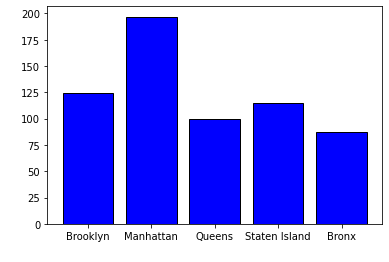

In [7]:
# Which neighborhood group has the highest avg price and plot the average prices in a bar chart
avg_price = air_bnb.groupby('neighbourhood_group')

brooklyn = avg_price.get_group('Brooklyn')['price'].mean()
manhattan = avg_price.get_group('Manhattan')['price'].mean()
queens = avg_price.get_group('Queens')['price'].mean()
staten_island = avg_price.get_group('Staten Island')['price'].mean()
bronx = avg_price.get_group('Bronx')['price'].mean()

plt.bar(
    air_bnb['neighbourhood_group'].unique(),
    [brooklyn, manhattan, queens, staten_island, bronx],
    color='b',
    ec='black'
)
plt.xlabel('Neighbourhood Groups', color='white')
plt.ylabel('Average Price', color='white')
# Answer: Manhattan with an average price of $196.88

In [8]:
# What is the most expensive neighbourhood in each neighbourhood_group
test = air_bnb.groupby(['neighbourhood_group', 'neighbourhood'])['price'].describe()
test.sort_values(['neighbourhood_group', 'mean'], ascending=False)
# Answer:   Staten Island - Fort Wadsworth - $800.00
#           Queens - Neponsit $274.67
#           Manhattan - Tribeca - $490.64
#           Brooklyn - Sea Gate - $487.86
#           Bronx - Riverdale - $442.09

count        mean          std    min  \
neighbourhood_group neighbourhood                                           
Staten Island       Fort Wadsworth    1.0  800.000000          NaN  800.0   
                    Woodrow           1.0  700.000000          NaN  700.0   
                    Prince's Bay      4.0  409.500000   561.875728   85.0   
                    Randall Manor    19.0  336.000000  1130.121282   13.0   
                    Willowbrook       1.0  249.000000          NaN  249.0   
...                                   ...         ...          ...    ...   
Bronx               Mount Eden        6.0   58.500000    46.194155   25.0   
                    Bronxdale        19.0   57.105263    20.283805   25.0   
                    Soundview        15.0   53.466667    19.115688   28.0   
                    Tremont          11.0   51.545455    34.468431   25.0   
                    Hunts Point      18.0   50.500000    27.181849   35.0   

                                       25%    50%     75%     max  
neighbourhood_group neighbourhood                                  
Staten Island       Fort Wadsworth  800.00  800.0  800.00   800.0  
                    Woodrow         700.00  700.0  700.00   700.0  
                    Prince's Bay    109.75  151.5  451.25  1250.0  
                    Randall Manor    52.50   79.0  104.50  5000.0  
                    Willowbrook     249.00  249.0  249.00   249.0  
...                                    ...    ...     ...     ...  
Bronx               Mount Eden       33.25   45.5   53.25   150.0  
                    Bronxdale        41.50   50.0   75.50   100.0  
                    Soundview        45.00   49.0   55.00   103.0  
                    Tremont          38.00   41.0   47.50   150.0  
                    Hunts Point      37.00   40.0   55.50   150.0  

[221 rows x 8 columns]

In [9]:
# Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
air_bnb['min_price'] = air_bnb['minimum_nights'] * air_bnb['price']
air_bnb[['host_name', 'min_price']].sort_values('min_price', ascending=False)
# Answer: Jenny with $1,170,000 

,host_name,min_price
48043,Jenny,1170000
9151,Kathrine,1000000
12342,Amy,989901
17811,Iveta,857750
44429,Noelle,730000
...,...,...
23161,Kimberly,0
25794,Adeyemi,0
26841,Sergii,0
26866,Sergii,0


In [10]:
# Who has no (zero) availability with a review count of 100 or more
air_bnb[(air_bnb['availability_365'] == 0) & (air_bnb['number_of_reviews'] >= 100)][['host_name', 'number_of_reviews', 'availability_365']]

# Answer: See table below

,host_name,number_of_reviews,availability_365
8,MaryEllen,118,0
94,Christiana,168,0
132,Sol,193,0
174,Coral,114,0
180,Doug,206,0
...,...,...,...
29581,Kathleen,103,0
30461,Janet,119,0
31250,Albert,102,0
32670,Stephany,131,0


In [11]:
# If each host rents all of their properties for the night, which 5 make the most that night?
one_night_max = air_bnb.groupby(['host_id', 'host_name']).sum()
one_night_max.sort_values('price', ascending=False).head(5)

# Answer: See table below

,,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,min_price
host_id,host_name,,,,,,,,,,
219517861,Sonder (NYC),10885561678,13316.25823,-24198.18856,82795,4353,1281,397.56,106929,98588,950453
107434423,Blueground,7210036953,9451.60418,-17166.13165,70331,7470,29,6.04,53824,58884,2258580
156158778,Sally,332529233,488.73929,-887.71735,37097,12,1,1.00,144,776,37097
205031545,Red Awning,1415225676,1996.92821,-3624.34656,35294,750,127,21.21,2401,10796,525450
30283594,Kara,1611854192,4931.41347,-8952.50779,33581,3767,65,3.94,14641,37924,1164243


In [12]:
# When did Danielle from Queens last receive a review?
air_bnb[air_bnb['host_name'] == 'Danielle'][['host_name', 'last_review']].sort_values('last_review', ascending=False).head(5)
# Answer: 2019-07-08

,host_name,last_review
22469,Danielle,2019-07-08
21517,Danielle,2019-07-07
20403,Danielle,2019-07-06
5717,Danielle,2019-07-06
29546,Danielle,2019-07-06


In [14]:
# bar chart showing the number of room types in the Bronx


# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

In [ ]:
# it should be the goal to maximize the reviews of your units as >150 units with > 100 had ZERO availabity 